In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 30 15:00:14 2018

@author: abdolghaniebrahimi
"""


# TensorFlow and tf.keras (keras is just loaded to used its default data set. I do not used keras anywhere for code implementation 
#and you should not use anything besides pure tensorflow for your assignments)
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os


##################################################################
#Important on how to use one gpu card:
os.environ["CUDA_VISIBLE_DEVICES"] = "1" #specifies that the code uses just gpu 0. you can just the number based on how many gpus are available on server.
##################################################################



/home/lab.analytics.northwestern.edu/gebrahimi/.conda/envs/snake/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### data loading and plot a sample

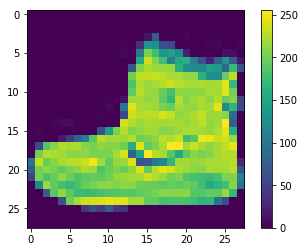

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)


#### Normalize data

In [3]:
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

### function to make mini batches

In [4]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches): #np.array_split splits the array to splits of equal size.
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

### Hyperparameters

In [5]:
n_epochs = 40
batch_size = 50

# parameters for structure of the neural network
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

#learning rate
learning_rate = 0.01

### construction phase

In [6]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer())
    print(hidden1)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    #y_proba = tf.nn.softmax(logits)


with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits) #for this fucntion you do not need to use one hot endcoding
    loss = tf.reduce_mean(xentropy, name="loss")
    


with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    

Tensor("dnn/hidden1/Relu:0", shape=(?, 300), dtype=float32)


### Execution phase

In [ ]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

0 Batch accuracy: 0.88 Validation accuracy: 0.803
1 Batch accuracy: 0.88 Validation accuracy: 0.8241
2 Batch accuracy: 0.84 Validation accuracy: 0.8385
3 Batch accuracy: 0.82 Validation accuracy: 0.8328
4 Batch accuracy: 0.86 Validation accuracy: 0.8443
5 Batch accuracy: 0.9 Validation accuracy: 0.8505
6 Batch accuracy: 0.86 Validation accuracy: 0.8516
7 Batch accuracy: 0.9 Validation accuracy: 0.8562
8 Batch accuracy: 0.74 Validation accuracy: 0.8496
9 Batch accuracy: 0.94 Validation accuracy: 0.8577
10 Batch accuracy: 0.88 Validation accuracy: 0.8618
11 Batch accuracy: 0.9 Validation accuracy: 0.8622
12 Batch accuracy: 0.86 Validation accuracy: 0.8639
13 Batch accuracy: 0.8 Validation accuracy: 0.8649
14 Batch accuracy: 0.94 Validation accuracy: 0.8658
15 Batch accuracy: 0.9 Validation accuracy: 0.8645
16 Batch accuracy: 0.9 Validation accuracy: 0.8681
17 Batch accuracy: 0.9 Validation accuracy: 0.8706
